In [1]:
import torch
from model import *
import numpy as np
from utils import *
from coder.BitsBack import *
from tqdm import tqdm
import time
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
opt = {}


opt["device"] = torch.device("cpu")
opt["if_cuda"] = False

def test(model,test_data,size,c_opt):
    D=np.prod(size)
    theory_list=[]
    true_list=[]
    compression_time=[]
    decompression_time=[]
    for i in tqdm(range(0,len(test_data))):
        test_img=test_data[i:i+1]
        ansstack = ANSStack(c_opt['s_prec'], c_opt['t_prec'],c_opt['p_prec'],randominit=True)
        stack_init_size=ansstack.get_length()
        
        start=time.time()
        ansstack =BBCompression(test_img.numpy(),ansstack,model,c_opt)
        end=time.time()
        compression_time.append(end-start)


        true_list.append((ansstack.get_length()-stack_init_size)/D)
        
        start=time.time()
        decode_img,ansstack=BBDecompression(ansstack,model,c_opt)
        end=time.time()
        decompression_time.append(end-start)
        if (np.int64(decode_img*255).reshape(-1)-np.int64(test_img*255).reshape(-1)).sum().item()>0:
            print('Error')


    return np.asarray(true_list).mean(),np.asarray(compression_time).mean(),np.asarray(decompression_time).mean()

In [2]:
opt['data_set']='BinaryMNIST'
opt['dataset_path']='../data/'
opt['save_path']='save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2


load_name='BinaryMNISTBernoulli_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data =torch.round(test_data.test_data[:1000].view(-1,784)/255)

c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Bernoulli'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=10
c_opt['log_num_discretization']=10
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['optimal']=False

b_bpd,b_c_time,b_d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)

print('BPD:',b_bpd)
print('averge compression time:',b_c_time)
print('averge decompression time:', b_d_time)

/home/mingtian/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
100%|██████████| 1000/1000 [00:13<00:00, 74.87it/s]

BPD: 0.18542857142857144
averge compression time: 0.006596334934234619
averge decompression time: 0.006595210790634155


In [3]:
opt['data_set']='BinaryMNIST'
opt['dataset_path']='../data/'
opt['save_path']='save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2


load_name='BinaryMNISTBernoulli_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data =torch.round(test_data.test_data[:1000].view(-1,784)/255)

c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Bernoulli'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=10
c_opt['log_num_discretization']=10
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['optimal']=False

r_bpd,r_c_time,r_d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)

print('BPD:',r_bpd)
print('averge compression time:',r_c_time)
print('averge decompression time:', r_d_time)

100%|██████████| 1000/1000 [00:12<00:00, 78.68it/s]

BPD: 0.17891326530612245
averge compression time: 0.006292159557342529
averge decompression time: 0.0062583487033844


In [4]:
opt['data_set']='BinaryMNIST'
opt['dataset_path']='../data/'
opt['save_path']='save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2


load_name='BinaryMNISTBernoulli_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data =torch.round(test_data.test_data[0:1000].view(-1,784)/255)

c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Bernoulli'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=10
c_opt['log_num_discretization']=10
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['optimal']=True
c_opt['optimal_lr']=5e-3


optimal_bpd=[]
optimal_compression_time=[]
optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)
    optimal_bpd.append(bpd)
    optimal_compression_time.append(c_time)
    optimal_decompression_time.append(d_time)
    
    
print(optimal_bpd)
print(optimal_compression_time)
print(optimal_decompression_time)

100%|██████████| 1000/1000 [00:34<00:00, 28.72it/s]

[0.18411479591836735, 0.1831530612244898, 0.1827066326530612, 0.1816607142857143, 0.18104209183673467, 0.18010586734693876, 0.17891198979591835, 0.178625, 0.17787117346938774, 0.17694132653061223]
[0.00791382098197937, 0.008951204299926758, 0.009943821907043456, 0.01104119038581848, 0.012135780811309815, 0.013152639627456665, 0.014193212509155274, 0.015237768411636352, 0.016322758197784424, 0.017303685903549193]
[0.0077983722686767575, 0.00881352424621582, 0.009871009826660157, 0.010936891078948975, 0.012001701593399049, 0.01307041072845459, 0.014100714206695557, 0.015143494844436646, 0.01622946572303772, 0.017214298963546752]


In [5]:
opt['data_set']='BinaryMNIST'
opt['dataset_path']='../data/'
opt['save_path']='save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2


load_name='BinaryMNISTBernoulli_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data =torch.round(test_data.test_data[0:1000].view(-1,784)/255)

c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Bernoulli'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=10
c_opt['log_num_discretization']=10
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['optimal']=True
c_opt['optimal_lr']=5e-3


improved_optimal_bpd=[]
improved_optimal_compression_time=[]
improved_optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)
    improved_optimal_bpd.append(bpd)
    improved_optimal_compression_time.append(c_time)
    improved_optimal_decompression_time.append(d_time)
    
print(improved_optimal_bpd)
print(improved_optimal_compression_time)
print(improved_optimal_decompression_time)

100%|██████████| 1000/1000 [00:35<00:00, 28.51it/s]

[0.17844897959183675, 0.17780739795918368, 0.17734183673469386, 0.17633801020408163, 0.1754591836734694, 0.17522448979591837, 0.17457653061224487, 0.17367091836734694, 0.17309438775510205, 0.1724872448979592]
[0.007744482040405273, 0.008946160316467285, 0.009957489252090454, 0.011049137353897094, 0.012190930843353272, 0.013222380638122559, 0.01423502492904663, 0.015239511251449584, 0.016304662227630617, 0.01741412115097046]
[0.007731963396072388, 0.008908094882965088, 0.009898643255233765, 0.010983538627624512, 0.012087156534194947, 0.01315265440940857, 0.014136003017425538, 0.015162160396575928, 0.016217724800109863, 0.01734120726585388]


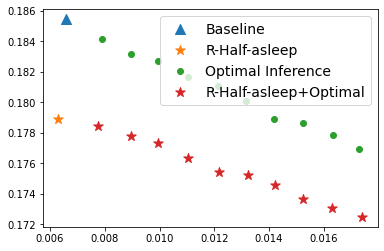

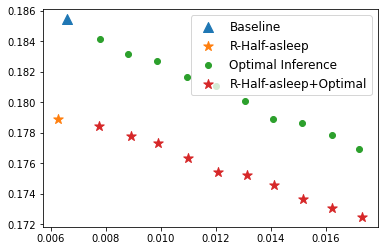

In [21]:
b_bpd= 0.18542857142857144
b_c_time= 0.006596334934234619
b_d_time= 0.006595210790634155


r_bpd= 0.17891326530612245
r_c_time= 0.006292159557342529
r_d_time= 0.0062583487033844


optimal_bpd=[0.18411479591836735, 0.1831530612244898, 0.1827066326530612, 0.1816607142857143, 0.18104209183673467, 0.18010586734693876, 0.17891198979591835, 0.178625, 0.17787117346938774, 0.17694132653061223]
optimal_compression_time=[0.00791382098197937, 0.008951204299926758, 0.009943821907043456, 0.01104119038581848, 0.012135780811309815, 0.013152639627456665, 0.014193212509155274, 0.015237768411636352, 0.016322758197784424, 0.017303685903549193]
optimal_decompression_time=[0.0077983722686767575, 0.00881352424621582, 0.009871009826660157, 0.010936891078948975, 0.012001701593399049, 0.01307041072845459, 0.014100714206695557, 0.015143494844436646, 0.01622946572303772, 0.017214298963546752]
improved_optimal_bpd=[0.17844897959183675, 0.17780739795918368, 0.17734183673469386, 0.17633801020408163, 0.1754591836734694, 0.17522448979591837, 0.17457653061224487, 0.17367091836734694, 0.17309438775510205, 0.1724872448979592]
improved_optimal_compression_time=[0.007744482040405273, 0.008946160316467285, 0.009957489252090454, 0.011049137353897094, 0.012190930843353272, 0.013222380638122559, 0.01423502492904663, 0.015239511251449584, 0.016304662227630617, 0.01741412115097046]
improved_optimal_decompression_time=[0.007731963396072388, 0.008908094882965088, 0.009898643255233765, 0.010983538627624512, 0.012087156534194947, 0.01315265440940857, 0.014136003017425538, 0.015162160396575928, 0.016217724800109863, 0.01734120726585388]

plt.scatter(b_c_time,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(r_c_time,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(optimal_compression_time[0:10],optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(improved_optimal_compression_time[0:10],improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)

plt.legend(prop={'size':14})
plt.show()

plt.scatter(b_d_time,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(r_d_time,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(optimal_decompression_time[0:10],optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(improved_optimal_decompression_time[0:10],improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)

plt.legend(prop={'size':12})
plt.show()

In [9]:
opt['data_set']='MNIST'
opt['dataset_path']='../data/'
opt['save_path']='./save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2
opt['x_dis']='Logistic'


load_name='MNISTLogistic_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))



test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data=test_data.test_data[:1000].view(-1,784)/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Logistic'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=14
c_opt['log_num_discretization']=12
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['x_dis']='Logistic'
c_opt['optimal']=False

b_bpd,b_c_time,b_d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)

print('BPD:',b_bpd)
print('averge compression time:',b_c_time)
print('averge decompression time:', b_d_time)

100%|██████████| 1000/1000 [01:36<00:00, 10.39it/s]

BPD: 1.5624438775510205
averge compression time: 0.04777522492408753
averge decompression time: 0.04805838418006897


In [10]:
opt['data_set']='MNIST'
opt['dataset_path']='../data/'
opt['save_path']='./save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2


load_name='MNISTLogistic_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))



test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data=test_data.test_data[:1000].view(-1,784)/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Logistic'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=14
c_opt['log_num_discretization']=12
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='Logistic'
c_opt['optimal']=False

r_bpd,r_c_time,r_d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)

print('BPD:',r_bpd)
print('averge compression time:',r_c_time)
print('averge decompression time:', r_d_time)

100%|██████████| 1000/1000 [01:36<00:00, 10.38it/s]

BPD: 1.551871173469388
averge compression time: 0.04775743985176086
averge decompression time: 0.04814213967323303


In [6]:
opt['data_set']='MNIST'
opt['dataset_path']='../data/'
opt['save_path']='./save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2
opt['x_dis']='Logistic'


load_name='MNISTLogistic_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))



test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data=test_data.test_data[:1000].view(-1,784)/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Logistic'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=14
c_opt['log_num_discretization']=12
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['x_dis']='Logistic'
c_opt['optimal']=True
c_opt['optimal_lr']=5e-3


optimal_bpd=[]
optimal_compression_time=[]
optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)
    optimal_bpd.append(bpd)
    optimal_compression_time.append(c_time)
    optimal_decompression_time.append(d_time)
    
print(optimal_bpd)
print(optimal_compression_time)
print(optimal_decompression_time)

100%|██████████| 1000/1000 [02:09<00:00,  7.74it/s]

[1.5589566326530613, 1.5569158163265306, 1.5547232142857141, 1.5527385204081634, 1.5514808673469387, 1.5495433673469388, 1.547966836734694, 1.5463507653061224, 1.5446096938775509, 1.5438979591836737]
[0.04892196536064148, 0.0513648841381073, 0.05279691624641419, 0.054905129909515384, 0.05653745436668396, 0.05821257781982422, 0.059699545860290526, 0.06180355668067932, 0.06304817390441894, 0.06434959363937377]
[0.0499337465763092, 0.05168793106079102, 0.053272400379180906, 0.05484371256828308, 0.05638885140419006, 0.05811495065689087, 0.059747947692871096, 0.06097430539131164, 0.062426702737808225, 0.06389659190177918]


In [7]:
opt['data_set']='MNIST'
opt['dataset_path']='../data/'
opt['save_path']='save/'
opt['z_dim']=10
opt['if_bn']=False
opt['h_layer_num']=2
opt['x_dis']='Logistic'


load_name='MNISTLogistic_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.MNIST(opt['dataset_path'], train=False, download=False)
test_data=test_data.test_data[:1000].view(-1,784)/255.

c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['obs_dis']='Logistic'
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=14
c_opt['log_num_discretization']=12
c_opt['z_dim']=10
c_opt['x_dim']=784
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['optimal']=True
c_opt['optimal_lr']=5e-3


improved_optimal_bpd=[]
improved_optimal_compression_time=[]
improved_optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_data,size=[1,1,28,28],c_opt=c_opt)
    improved_optimal_bpd.append(bpd)
    improved_optimal_compression_time.append(c_time)
    improved_optimal_decompression_time.append(d_time)
    
print(improved_optimal_bpd)
print(improved_optimal_compression_time)
print(improved_optimal_decompression_time)

100%|██████████| 1000/1000 [02:10<00:00,  7.68it/s]

[1.5495599489795917, 1.5478903061224492, 1.546516581632653, 1.5447359693877551, 1.5427704081632654, 1.5407997448979591, 1.5402053571428571, 1.539595663265306, 1.537625, 1.536579081632653]
[0.049268638849258424, 0.05151097655296326, 0.05297412419319153, 0.05523858618736267, 0.05651236653327942, 0.05871378111839294, 0.05999475908279419, 0.061941262006759645, 0.06274146056175232, 0.06500049877166748]
[0.049955970287323, 0.05162047147750855, 0.05325354504585266, 0.05497731804847717, 0.05663966464996338, 0.05821455216407776, 0.059779640197753905, 0.061641191244125364, 0.06256738066673279, 0.06439792799949647]


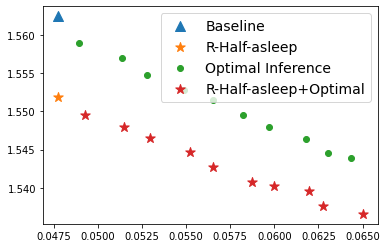

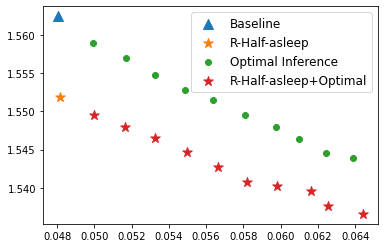

In [22]:
b_bpd= 1.5624438775510205
b_c_time=  0.04777522492408753
b_d_time= 0.04805838418006897


r_bpd=1.551871173469388
r_c_time= 0.04775743985176086
r_d_time= 0.04814213967323303



optimal_bpd=[1.5589566326530613, 1.5569158163265306, 1.5547232142857141, 1.5527385204081634, 1.5514808673469387, 1.5495433673469388, 1.547966836734694, 1.5463507653061224, 1.5446096938775509, 1.5438979591836737]
optimal_compression_time=[0.04892196536064148, 0.0513648841381073, 0.05279691624641419, 0.054905129909515384, 0.05653745436668396, 0.05821257781982422, 0.059699545860290526, 0.06180355668067932, 0.06304817390441894, 0.06434959363937377]
optimal_decompression_time=[0.0499337465763092, 0.05168793106079102, 0.053272400379180906, 0.05484371256828308, 0.05638885140419006, 0.05811495065689087, 0.059747947692871096, 0.06097430539131164, 0.062426702737808225, 0.06389659190177918]
improved_optimal_bpd=[1.5495599489795917, 1.5478903061224492, 1.546516581632653, 1.5447359693877551, 1.5427704081632654, 1.5407997448979591, 1.5402053571428571, 1.539595663265306, 1.537625, 1.536579081632653]
improved_optimal_compression_time=[0.049268638849258424, 0.05151097655296326, 0.05297412419319153, 0.05523858618736267, 0.05651236653327942, 0.05871378111839294, 0.05999475908279419, 0.061941262006759645, 0.06274146056175232, 0.06500049877166748]
improved_optimal_decompression_time=[0.049955970287323, 0.05162047147750855, 0.05325354504585266, 0.05497731804847717, 0.05663966464996338, 0.05821455216407776, 0.059779640197753905, 0.061641191244125364, 0.06256738066673279, 0.06439792799949647]

plt.scatter(b_c_time,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(r_c_time,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(optimal_compression_time[0:10],optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(improved_optimal_compression_time[0:10],improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)
plt.legend(prop={'size':14})
plt.show()

plt.scatter(b_d_time,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(r_d_time,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(optimal_decompression_time[0:10],optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(improved_optimal_decompression_time[0:10],improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)
plt.legend(prop={'size':12})
plt.show()

In [13]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='LogisticCA'
opt['net']='res'
opt['z_dim']=64
opt['save_path']='./save/'
opt['dataset_path']='../data/cifar10'


load_name='CIFARLogisticCA_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=64
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='LogisticCA'
c_opt['optimal']=False

b_bpd,b_c_time,b_d_time=test(model,test_img,c_opt['x_dim'],c_opt)

print('BPD:',b_bpd)
print('averge compression time:',b_c_time)
print('averge decompression time:', b_d_time)

100%|██████████| 1000/1000 [08:16<00:00,  2.02it/s]

BPD: 5.484529296875
averge compression time: 0.22709216380119324
averge decompression time: 0.26786298060417174


In [14]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='LogisticCA'
opt['net']='res'
opt['z_dim']=64
opt['save_path']='./save/'
opt['dataset_path']='../data/cifar10'


load_name='CIFARLogisticCA_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=64
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='LogisticCA'
c_opt['optimal']=False

r_bpd,r_c_time,r_d_time=test(model,test_img,c_opt['x_dim'],c_opt)

print('BPD:',r_bpd)
print('averge compression time:',r_c_time)
print('averge decompression time:', r_d_time)

100%|██████████| 1000/1000 [08:23<00:00,  1.99it/s]

BPD: 5.383048502604166
averge compression time: 0.23055591917037963
averge decompression time: 0.27150887989997863


In [15]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='LogisticCA'
opt['net']='res'
opt['z_dim']=64
opt['save_path']='./save/'
opt['dataset_path']='../data/cifar10'


load_name='CIFARLogisticCA_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=64
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='LogisticCA'
c_opt['optimal']=True
c_opt['optimal_lr']=3e-3



optimal_bpd=[]
optimal_compression_time=[]
optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_img,c_opt['x_dim'],c_opt=c_opt)
    optimal_bpd.append(bpd)
    optimal_compression_time.append(c_time)
    optimal_decompression_time.append(d_time)
    print(c_opt['iterations'],bpd,c_time,d_time)

    
print(optimal_bpd)
print(optimal_compression_time)
print(optimal_decompression_time)

  0%|          | 0/1000 [00:00<?, ?it/s]

1 5.4778974609375 0.3070893747806549 0.3828784883022308


  0%|          | 0/1000 [00:00<?, ?it/s]

2 5.476442708333333 0.38802841448783876 0.4635542781352997


  0%|          | 0/1000 [00:00<?, ?it/s]

3 5.472292317708333 0.47115187501907346 0.5448802485466003


  0%|          | 0/1000 [00:00<?, ?it/s]

4 5.467352213541667 0.5519817571640014 0.6276438181400299


  0%|          | 0/1000 [00:00<?, ?it/s]

5 5.463662109375 0.6354573566913605 0.7093455250263214


  0%|          | 0/1000 [00:00<?, ?it/s]

6 5.4608580729166665 0.719170473575592 0.7936049542427063


  0%|          | 0/1000 [00:00<?, ?it/s]

7 5.4572275390625 0.8022599184513092 0.8760602467060089


  0%|          | 0/1000 [00:00<?, ?it/s]

8 5.4526796875 0.8845734550952912 0.9587714960575103


  0%|          | 0/1000 [00:00<?, ?it/s]

9 5.450996419270834 0.9689023032188415 1.0409894592761992


100%|██████████| 1000/1000 [36:13<00:00,  2.17s/it]

10 5.445861328125 1.048544252872467 1.1240137197971345
[5.4778974609375, 5.476442708333333, 5.472292317708333, 5.467352213541667, 5.463662109375, 5.4608580729166665, 5.4572275390625, 5.4526796875, 5.450996419270834, 5.445861328125]
[0.3070893747806549, 0.38802841448783876, 0.47115187501907346, 0.5519817571640014, 0.6354573566913605, 0.719170473575592, 0.8022599184513092, 0.8845734550952912, 0.9689023032188415, 1.048544252872467]
[0.3828784883022308, 0.4635542781352997, 0.5448802485466003, 0.6276438181400299, 0.7093455250263214, 0.7936049542427063, 0.8760602467060089, 0.9587714960575103, 1.0409894592761992, 1.1240137197971345]


In [16]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='LogisticCA'
opt['net']='res'
opt['z_dim']=64
opt['save_path']='./save/'
opt['dataset_path']='../data/cifar10'


load_name='CIFARLogisticCA_improved.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=64
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='LogisticCA'
c_opt['optimal']=True
c_opt['optimal_lr']=3e-3



improved_optimal_bpd=[]
improved_optimal_compression_time=[]
improved_optimal_decompression_time=[]
for c_opt['iterations'] in range(1,11):
    bpd,c_time,d_time=test(model,test_img,c_opt['x_dim'],c_opt=c_opt)
    improved_optimal_bpd.append(bpd)
    improved_optimal_compression_time.append(c_time)
    improved_optimal_decompression_time.append(d_time)
    print(c_opt['iterations'],bpd,c_time,d_time)

    
print(improved_optimal_bpd)
print(improved_optimal_compression_time)
print(improved_optimal_decompression_time)

  0%|          | 0/1000 [00:00<?, ?it/s]

1 5.380570638020834 0.3085553593635559 0.3852712676525116


  0%|          | 0/1000 [00:00<?, ?it/s]

2 5.376001627604166 0.3872934617996216 0.46512526941299437


  0%|          | 0/1000 [00:00<?, ?it/s]

3 5.374486653645833 0.4712095775604248 0.5458041334152222


  0%|          | 0/1000 [00:00<?, ?it/s]

4 5.3709928385416665 0.553845678806305 0.627924015045166


  0%|          | 0/1000 [00:00<?, ?it/s]

5 5.368490559895833 0.6362846415042878 0.7108374407291412


  0%|          | 0/1000 [00:00<?, ?it/s]

6 5.3654912109375 0.7188425455093383 0.7929675426483155


  0%|          | 0/1000 [00:00<?, ?it/s]

7 5.3620771484375 0.8018801105022431 0.8767828722000122


  0%|          | 0/1000 [00:00<?, ?it/s]

8 5.359796549479166 0.8834116022586822 0.9578735392093658


  0%|          | 0/1000 [00:00<?, ?it/s]

9 5.356903645833334 0.9669484186172486 1.0389905326366424


100%|██████████| 1000/1000 [36:18<00:00,  2.18s/it]

10 5.355041341145834 1.050091291666031 1.127310045003891
[5.380570638020834, 5.376001627604166, 5.374486653645833, 5.3709928385416665, 5.368490559895833, 5.3654912109375, 5.3620771484375, 5.359796549479166, 5.356903645833334, 5.355041341145834]
[0.3085553593635559, 0.3872934617996216, 0.4712095775604248, 0.553845678806305, 0.6362846415042878, 0.7188425455093383, 0.8018801105022431, 0.8834116022586822, 0.9669484186172486, 1.050091291666031]
[0.3852712676525116, 0.46512526941299437, 0.5458041334152222, 0.627924015045166, 0.7108374407291412, 0.7929675426483155, 0.8767828722000122, 0.9578735392093658, 1.0389905326366424, 1.127310045003891]


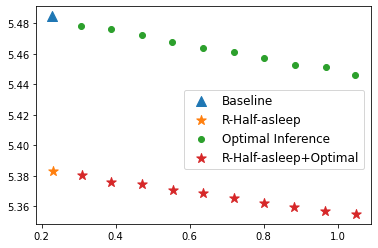

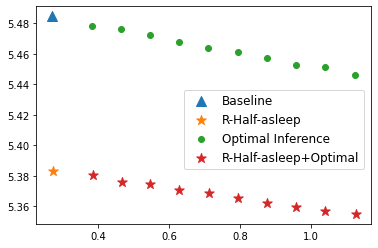

In [51]:
b_bpd= 5.484529296875
b_c_time=  0.22709216380119324
b_d_time= 0.26786298060417174


r_bpd=5.383048502604166
r_c_time= 0.23055591917037963
r_d_time= 0.27150887989997863


optimal_bpd=[5.4778974609375, 5.476442708333333, 5.472292317708333, 5.467352213541667, 5.463662109375, 5.4608580729166665, 5.4572275390625, 5.4526796875, 5.450996419270834, 5.445861328125]
optimal_compression_time=[0.3070893747806549, 0.38802841448783876, 0.47115187501907346, 0.5519817571640014, 0.6354573566913605, 0.719170473575592, 0.8022599184513092, 0.8845734550952912, 0.9689023032188415, 1.048544252872467]
optimal_decompression_time=[0.3828784883022308, 0.4635542781352997, 0.5448802485466003, 0.6276438181400299, 0.7093455250263214, 0.7936049542427063, 0.8760602467060089, 0.9587714960575103, 1.0409894592761992, 1.1240137197971345]


improved_optimal_bpd=[5.380570638020834, 5.376001627604166, 5.374486653645833, 5.3709928385416665, 5.368490559895833, 5.3654912109375, 5.3620771484375, 5.359796549479166, 5.356903645833334, 5.355041341145834]
improved_optimal_compression_time=[0.3085553593635559, 0.3872934617996216, 0.4712095775604248, 0.553845678806305, 0.6362846415042878, 0.7188425455093383, 0.8018801105022431, 0.8834116022586822, 0.9669484186172486, 1.050091291666031]
improved_optimal_decompression_time=[0.3852712676525116, 0.46512526941299437, 0.5458041334152222, 0.627924015045166, 0.7108374407291412, 0.7929675426483155, 0.8767828722000122, 0.9578735392093658, 1.0389905326366424, 1.127310045003891]


plt.scatter(b_c_time,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(r_c_time,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(optimal_compression_time[0:10],optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(improved_optimal_compression_time[0:10],improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)
plt.legend(prop={'size':12},loc=(0.44,0.25))
plt.show()

plt.scatter(b_d_time,b_bpd,marker='^', label='Baseline',s=100)
plt.scatter(r_d_time,r_bpd,marker='*', label='R-Half-asleep',s=100)
plt.scatter(optimal_decompression_time[0:10],optimal_bpd[0:10], label='Optimal Inference')
plt.scatter(improved_optimal_decompression_time[0:10],improved_optimal_bpd[0:10],marker='*', label='R-Half-asleep+Optimal',s=100)
plt.legend(prop={'size':12},loc=(0.44,0.25))
plt.show()

In [19]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='LogisticCA'
opt['net']='res'
opt['z_dim']=64
opt['save_path']='./save/'
opt['dataset_path']='../data/cifar10'


load_name='CIFARLogisticCA_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=64
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='LogisticCA'
c_opt['optimal']=True
c_opt['optimal_lr']=3e-3
c_opt['iterations']=50

print(test(model,test_img,c_opt['x_dim'],c_opt))


100%|██████████| 1000/1000 [2:28:08<00:00,  8.89s/it] 

(5.3727887369791665, 4.405046655893326, 4.482025105237961)


In [52]:
opt["device"] = torch.device("cpu")
opt["if_cuda"] = False
opt['data_set']='CIFAR'
opt['x_dis']='LogisticCA'
opt['net']='res'
opt['z_dim']=64
opt['save_path']='./save/'
opt['dataset_path']='../data/cifar10'


load_name='CIFARLogisticCA_epoch100.pth'
model=VAE(opt).to(opt['device'])
model.load_state_dict(torch.load(opt['save_path']+load_name))


test_data=torchvision.datasets.CIFAR10(opt['dataset_path'], train=False, download=False)
test_img=torch.tensor(test_data.data[:1000],dtype=torch.float32).permute(0,3,1,2).contiguous()/255.


c_opt={}
c_opt['data_set']=opt['data_set']
c_opt['device']=opt["device"]
c_opt['s_prec']=64
c_opt['t_prec']=32
c_opt['p_prec']=16
c_opt['log_num_discretization']=16
c_opt['z_dim']=64
c_opt['x_dim']=3072
c_opt['discretization_scheme']=std_gaussian_buckets(c_opt['log_num_discretization'])
c_opt['discretization_centres']=std_gaussian_centres(c_opt['log_num_discretization'])
c_opt['obs_dis']='LogisticCA'
c_opt['optimal']=True
c_opt['optimal_lr']=3e-3
c_opt['iterations']=40

print(test(model,test_img,c_opt['x_dim'],c_opt))


100%|██████████| 1000/1000 [1:58:33<00:00,  7.11s/it]

(5.385165690104168, 3.516919534444809, 3.595303210258484)
